In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression,lars_path,LassoCV,RidgeCV, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, max_error, mean_absolute_error


In [328]:
data = pd.read_csv('../data/listings_cleaned.csv',index_col=['id'])

In [329]:
data

host_listings_count   latitude  longitude  accommodates  bathrooms  \
id                                                                             
1947                        4  41.902460  -87.63405             2        1.0   
2384                        1  41.787900  -87.58780             1        1.0   
4505                        1  41.854950  -87.69696             7        1.0   
7126                        2  41.902890  -87.68182             2        1.0   
9811                       10  41.917690  -87.63788             4        1.0   
...                       ...        ...        ...           ...        ...   
43239736                    1  41.799870  -87.59402             2        1.0   
43249502                    4  41.891024  -87.67846            15        3.0   
43250054                    1  41.976380  -87.66719             4        1.0   
43254537                    1  41.952581  -87.65672             4        1.5   
43255785                    0  41.883560  -87.63308             3        1.0   

          price  security_deposit  cleaning_fee  extra_people  minimum_nights  \
id                                                                              
1947       59.0             100.0           0.0           0.0              14   
2384       55.0               0.0          20.0           0.0               2   
4505      117.0               0.0          30.0          20.0               2   
7126       80.0               0.0           0.0           0.0               2   
9811      150.0               0.0          85.0          25.0               4   
...         ...               ...           ...           ...             ...   
43239736   65.0               0.0           0.0           0.0               1   
43249502  200.0             500.0         150.0          10.0               1   
43250054   63.0               0.0           0.0           0.0               1   
43254537   75.0               0.0           0.0           0.0               3   
43255785  100.0               0.0           0.0           0.0              32   

          maximum_nights  maximum_minimum_nights  minimum_maximum_nights  \
id                                                                         
1947                  60                      18                      60   
2384                  90                       2                    1125   
4505                  60                       2                      60   
7126                  60                       2                      60   
9811                 180                       4                     180   
...                  ...                     ...                     ...   
43239736            1125                       1                    1125   
43249502            1125                       1                    1125   
43250054            1125                       1                    1125   
43254537              30                       3                      30   
43255785              45                      32                    1125   

          availability_30  availability_365  number_of_reviews  \
id                                                               
1947                    0                 3                  4   
2384                   22               322                178   
4505                    0               146                394   
7126                   29               335                384   
9811                    4               320                 49   
...                   ...               ...                ...   
43239736               14                14                  0   
43249502               28               178                  0   
43250054               24               174                  0   
43254537               26               208                  0   
43255785               30               166                  0   

          number_of_reviews_ltm  
id                               

In [330]:
to_drop = ['security_deposit','availability_365','maximum_minimum_nights','minimum_maximum_nights']
data = data.drop(to_drop,axis=1)

# Implementing Regression Models Trial 1 

In [331]:
def prog():
    scaler = StandardScaler()
    for x in to_drop: 
        print('Dropped {}'.format(x))
        data_temp = data.drop(x,axis=1)
        X = data_temp.drop(columns='price')
        y = data_temp.price
        X_scaled = scaler.fit_transform(X)
        y_scaled = scaler.fit_transform(y.values.reshape(-1,1))
        X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled, random_state=0,test_size = 0.25)
        linreg = LinearRegression()
        linreg.fit(X_scaled,y_scaled)
        y_train_pred = linreg.predict(X_train)
        y_test_pred = linreg.predict(X_test)
        print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
        print("Validation r2:", round(r2_score(y_test, y_test_pred),4))

In [332]:
#prog()

In [333]:
X = data.drop(columns='price')
y = data.price

In [334]:
price_labels = pd.qcut(y.values, q=4,labels=['Cheap','Lower Middle','Upped Middle','Luxury'])

In [335]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1,1))

In [336]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled, random_state=0,test_size = 0.25)

In [337]:
linreg = LinearRegression()
linreg.fit(X_scaled,y_scaled)
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_test_pred),4))


Training r2: 0.3613
Validation r2: 0.4003


In [338]:
# elastic=ElasticNet(tol=.1)
# search=GridSearchCV(estimator=elastic,param_grid={'alpha':alphas,'l1_ratio':[.2,.4,.6,.8]},scoring='r2',n_jobs=1,cv=10)
# search.fit(X_train,y_train)
# search.best_score_

In [339]:
alphas = 10**np.linspace(-2,4,200)
alphas1 = np.linspace(-2,2,200)
lasso = LassoCV(alphas=alphas,cv=10).fit(X_train,y_train.ravel())
print("Score without interactions: {:.4f}".format(lasso.score(X_test, y_test)))
print('Best alpha value: {:.3f}'.format(lasso.alpha_))

Score without interactions: 0.3977
Best alpha value: 0.010


In [340]:
def lassocv(dataset,target):
  scaler = StandardScaler()
  dataset_scaled = scaler.fit_transform(dataset)
  target_transformed = scaler.fit_transform(target.values.reshape(-1,1))
  X_train, X_test, y_train, y_test = train_test_split(dataset_scaled,target_transformed, random_state=0,test_size = 0.25)
  alphas = 10**np.linspace(-2,3,200)
  lasso = LassoCV(alphas=alphas,cv=10,tol=0.1).fit(X_train, y_train.ravel()) 
  print("Score without interactions: {:.4f}".format(lasso.score(X_test, y_test)))
  print('Best alpha value: {:.3f}'.format(lasso.alpha_))
  alphas, _, coefs = lars_path(X_train, y_train.ravel(), method='lasso')
  # # plotting the LARS path
  xx = np.sum(np.abs(coefs.T), axis=1)
  xx /= xx[-1]
  plt.figure(figsize=(12,8))
  plt.plot(xx, coefs.T)
  ymin, ymax = plt.ylim()
  plt.vlines(xx, ymin, ymax, linestyle='dashed')
  plt.xlabel('|coef| / max|coef|')
  plt.ylabel('Coefficients')
  plt.title('LASSO Path')
  plt.axis('tight')
  plt.legend(X.columns,loc = 'best')
  plt.show() 

  y_pred = lasso.predict(X_test)
  labels = pd.qcut(y_pred, q=4,labels=['Cheap','Lower Middle','Upped Middle','Luxury'])
  plt.figure(figsize=(12,8))
  plt.scatter(y_test, y_pred)
  plt.plot([-5,5],[-5,5],color='blue')
  plt.grid(True)
  plt.title('Predicted vs. Actual Rental Price with LASSO CV')
  plt.ylabel('Rental Price Predicted')
  plt.xlabel('Rental Price Actual');

Score without interactions: 0.3984
Best alpha value: 0.010


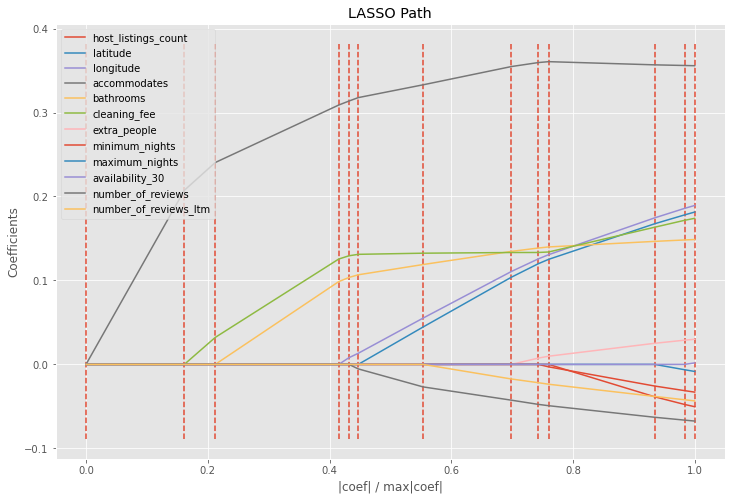

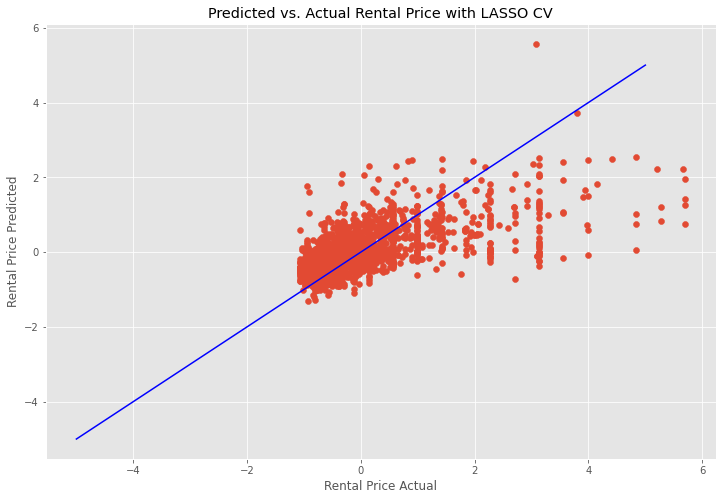

In [341]:
lassocv(X,y)

In [342]:
ridge = RidgeCV(normalize=False,alphas=alphas,cv=10).fit(X_train, y_train) 
print("R^2 Score: {:.4f}".format(ridge.score(X_test, y_test)))
print('Best alpha value: {:.3f}'.format(ridge.alpha_))

R^2 Score: 0.3974
Best alpha value: 77.526


In [343]:
from sklearn.decomposition import PCA

In [344]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print('Original Shape {}'.format(X.shape))
print('Transformed Shape {}'.format(X_pca.shape))

Original Shape (8351, 12)
Transformed Shape (8351, 2)


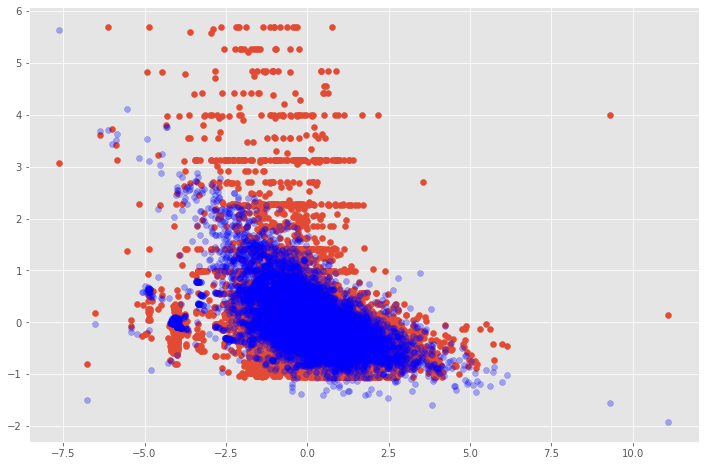

In [345]:
yfit = linreg.predict(X_scaled)
plt.figure(figsize=(12,8))
plt.scatter(X_pca[:,0],y_scaled)
plt.scatter(X_pca[:,0],yfit,c='b',alpha=0.3)

<Figure size 432x288 with 0 Axes>

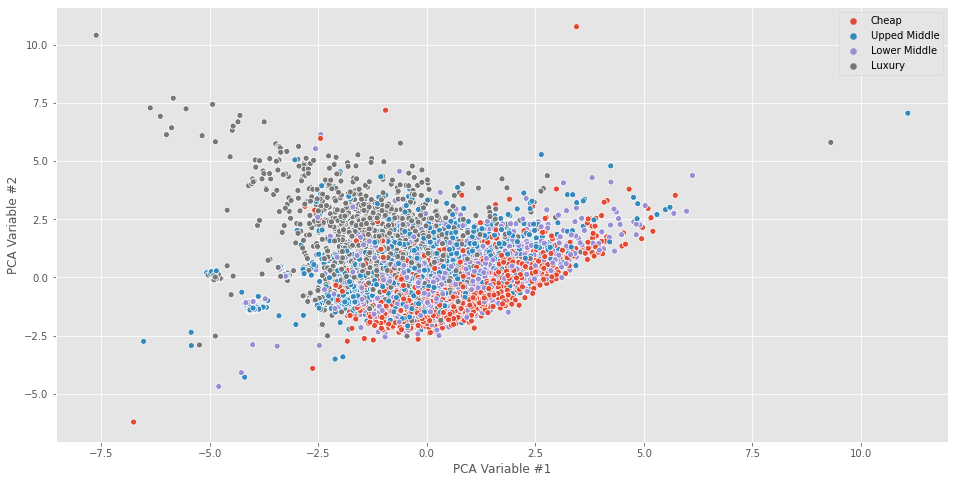

In [346]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(16,8))
sns.scatterplot(x = X_pca[:,0], y = X_pca[:,1], hue=price_labels)
ax.set_xlabel('PCA Variable #1')
ax.set_ylabel('PCA Variable #2')
# plt.savefig('pca 3d colored.png')
plt.show()

In [347]:
def poly_lassocv(dataset,target,z):
  scaler = StandardScaler()
  dataset_scaled = scaler.fit_transform(dataset)
  target_transformed = scaler.fit_transform(target.values.reshape(-1,1))
  X_train, X_test, y_train, y_test = train_test_split(dataset_scaled,target_transformed, random_state=0,test_size = 0.25)
  #alphas = 10**np.linspace(-2,3,200)
  poly = PolynomialFeatures(degree=z).fit(X_train)
  X_train_poly = poly.transform(X_train) 
  X_test_poly = poly.transform(X_test) 
  print("X_train.shape: {}".format(X_train.shape)) 
  print("X_train_poly.shape: {}".format(X_train_poly.shape))
  print("Polynomial feature names:\n{}".format(poly.get_feature_names()))
  # model = LinearRegression()
  # model.fit(X_train_poly, y_train)
  # print("Linear Regression Test score : {:.4f}".format(model.score(X_test_poly,y_test)))
  alphas = 10**np.linspace(-2,2,1000)
  lasso = LassoCV(alphas=alphas,cv=10,tol=0.1).fit(X_train_poly, y_train.ravel()) 
  # print("Test score for degree ", z, ":", lasso.score(X_test_poly,y_test))
  print("Test score for degree {:}: {:.3f}".format(z, lasso.score(X_test_poly,y_test)))

## poly_lassocv(X,y,2)